In [81]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sidhu1425","key":"4eeb5fbf0e37abb8ba8b73b4339ed8fc"}'}

In [82]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [83]:
!kaggle competitions download -c dogs-vs-cats
!unzip -qq train.zip

 98% 534M/543M [00:03<00:00, 154MB/s]
100% 543M/543M [00:03<00:00, 154MB/s]
100% 271M/271M [00:02<00:00, 146MB/s]
100% 271M/271M [00:02<00:00, 125MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 76.4MB/s]


In [84]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating Train, test and validation sets with 1000, 500 and 500 records respectively
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [85]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [86]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [87]:
for i, element in enumerate(dataset):
  print(element.shape)
  if i >= 2:
          break

#Getting the batches in steps of 32
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [88]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [96]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [97]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [99]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"),
         EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 5s 76ms/step - loss: 0.6566 - accuracy: 0.6110 - val_loss: 0.6600 - val_accuracy: 0.5950
Epoch 2/50
63/63 [==============================] - 5s 76ms/step - loss: 0.6318 - accuracy: 0.6415 - val_loss: 0.6575 - val_accuracy: 0.6380
Epoch 3/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6155 - accuracy: 0.6835 - val_loss: 0.6398 - val_accuracy: 0.6320
Epoch 4/50
63/63 [==============================] - 5s 74ms/step - loss: 0.5961 - accuracy: 0.6785 - val_loss: 0.6579 - val_accuracy: 0.6500
Epoch 5/50
63/63 [==============================] - 5s 76ms/step - loss: 0.5583 - accuracy: 0.7095 - val_loss: 0.5982 - val_accuracy: 0.6890
Epoch 6/50
63/63 [==============================] - 5s 75ms/step - loss: 0.5338 - accuracy: 0.7350 - val_loss: 0.6721 - val_accuracy: 0.6650
Epoch 7/50
63/63 [==============================] - 5s 76ms/step - loss: 0.4885 - accuracy: 0.7640 - val_loss: 0.6586 - val_accuracy: 0.6910
Epoch 8/50
63

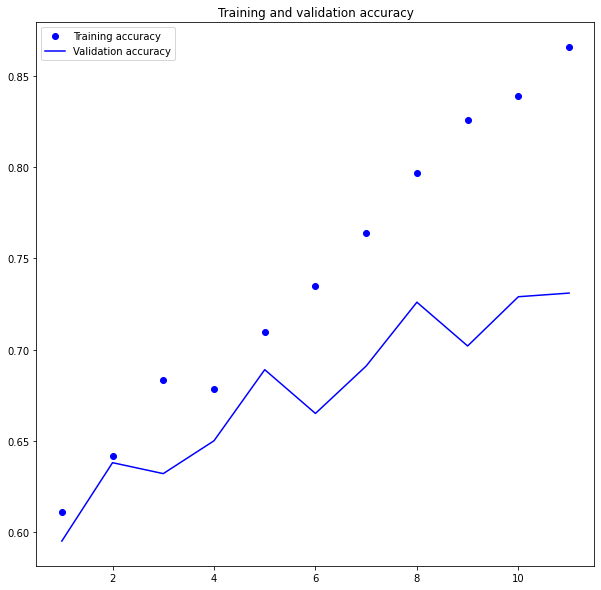

<Figure size 432x288 with 0 Axes>

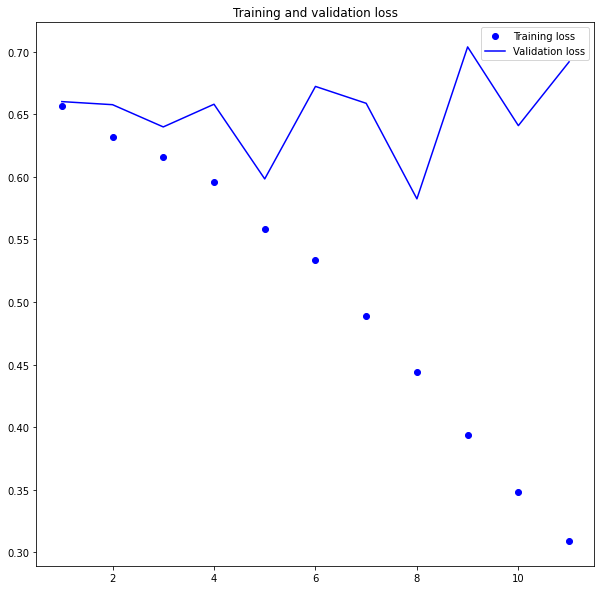

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [101]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 38ms/step - loss: 0.6268 - accuracy: 0.7130
Test accuracy: 0.713


We achieved the following: 

Train Accuracy is 86.6%
Validation Accuracy is 73.1
Test Accuracy is 71.3

In [103]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating Train, Validation and Test sets with 1500, 500 and 500 observations respectively
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [104]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

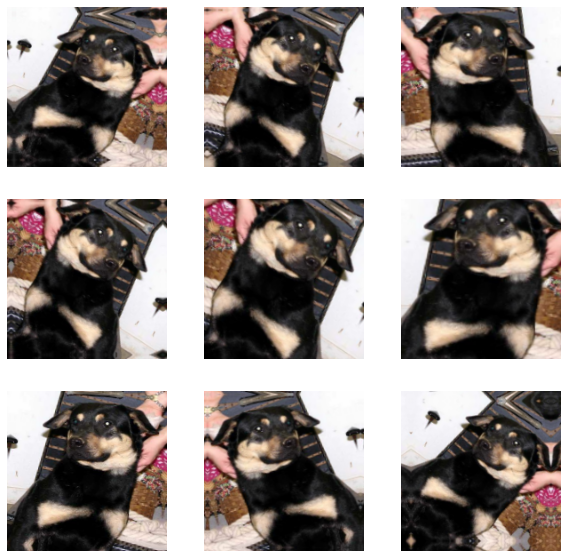

In [105]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [106]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [107]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"),
        EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/50
63/63 [==============================] - 7s 81ms/step - loss: 0.6951 - accuracy: 0.4925 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6933 - accuracy: 0.5080 - val_loss: 0.6927 - val_accuracy: 0.5170
Epoch 3/50
63/63 [==============================] - 5s 78ms/step - loss: 0.6932 - accuracy: 0.5110 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6941 - accuracy: 0.5045 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 00004: early stopping


In [108]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 37ms/step - loss: 0.6927 - accuracy: 0.5000
Test accuracy: 0.500


We achieved the following:

Train Accuracy is 50.45% Validation Accuracy is 50.2 Test Accuracy is 50.0

Question 3: Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [109]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating Train, validation and test sets with 2000, 500 and 500 records respectively.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [110]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [111]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss"),
        EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 15s 80ms/step - loss: 0.6948 - accuracy: 0.5165 - val_loss: 0.6898 - val_accuracy: 0.5220
Epoch 2/50
63/63 [==============================] - 5s 76ms/step - loss: 0.6941 - accuracy: 0.5335 - val_loss: 0.6901 - val_accuracy: 0.5120
Epoch 3/50
63/63 [==============================] - 5s 78ms/step - loss: 0.6905 - accuracy: 0.5485 - val_loss: 0.6879 - val_accuracy: 0.5470
Epoch 4/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6867 - accuracy: 0.5600 - val_loss: 0.6544 - val_accuracy: 0.6240
Epoch 5/50
63/63 [==============================] - 5s 78ms/step - loss: 0.6742 - accuracy: 0.5940 - val_loss: 0.6523 - val_accuracy: 0.6300
Epoch 6/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6594 - accuracy: 0.5915 - val_loss: 0.6446 - val_accuracy: 0.6240
Epoch 7/50
63/63 [==============================] - 5s 76ms/step - loss: 0.6641 - accuracy: 0.5930 - val_loss: 0.6863 - val_accuracy: 0.5450
Epoch 8/50
6

In [112]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 39ms/step - loss: 0.5621 - accuracy: 0.7310
Test accuracy: 0.731


We achieved the following:

Train Accuracy is 77.55% Validation Accuracy is 73.0 Test Accuracy is 73.1

Data Agumentation was introduced to reduce the overfitting of the model. The test accuracy dropped from 71 to 50. When the sample size was increased, we found that the test accuracy improved to 73.1.

Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [151]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [152]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [153]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [154]:
train_features.shape

(2000, 5, 5, 512)

In [155]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 19.1622 - accuracy: 0.9235 - val_loss: 10.3519 - val_accuracy: 0.9420
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.4993 - accuracy: 0.9730 - val_loss: 3.8539 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.9910 - val_loss: 4.5334 - val_accuracy: 0.9780
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7724 - accuracy: 0.9880 - val_loss: 4.1358 - val_accuracy: 0.9820
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8486 - accuracy: 0.9940 - val_loss: 5.2561 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3069 - accuracy: 0.9890 - val_loss: 4.6444 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7160 - accuracy: 0.9950 - val_loss: 4.4854 - val_accuracy: 0.9760
Epoch 8/20
63/63 

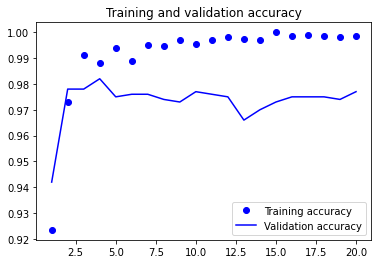

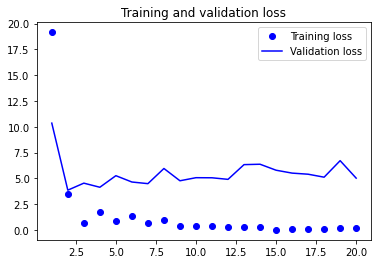

In [156]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [157]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [158]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [159]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [160]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [161]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 95ms/step - loss: 26.9392 - accuracy: 0.8425 - val_loss: 8.3555 - val_accuracy: 0.9510
Epoch 2/30
63/63 [==============================] - 6s 91ms/step - loss: 11.8333 - accuracy: 0.9115 - val_loss: 6.0624 - val_accuracy: 0.9660
Epoch 3/30
63/63 [==============================] - 6s 91ms/step - loss: 11.2976 - accuracy: 0.9145 - val_loss: 3.8615 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 6s 88ms/step - loss: 9.4869 - accuracy: 0.9245 - val_loss: 6.6792 - val_accuracy: 0.9610
Epoch 5/30
63/63 [==============================] - 6s 87ms/step - loss: 6.7226 - accuracy: 0.9300 - val_loss: 4.3448 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 6s 91ms/step - loss: 7.5394 - accuracy: 0.9330 - val_loss: 3.2716 - val_accuracy: 0.9720
Epoch 7/30
63/63 [==============================] - 6s 87ms/step - loss: 6.1267 - accuracy: 0.9420 - val_loss: 4.5281 - val_accuracy: 0.9720
Epoch 8/30

In [162]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 54ms/step - loss: 0.3233 - accuracy: 0.9750
Test accuracy: 0.975


In [163]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [164]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [165]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 8s 103ms/step - loss: 0.4921 - accuracy: 0.9630 - val_loss: 0.3845 - val_accuracy: 0.9780
Epoch 2/15
63/63 [==============================] - 7s 100ms/step - loss: 0.3532 - accuracy: 0.9640 - val_loss: 0.2764 - val_accuracy: 0.9800
Epoch 3/15
63/63 [==============================] - 6s 95ms/step - loss: 0.2815 - accuracy: 0.9655 - val_loss: 0.4419 - val_accuracy: 0.9780
Epoch 4/15
63/63 [==============================] - 7s 99ms/step - loss: 0.2593 - accuracy: 0.9610 - val_loss: 0.2430 - val_accuracy: 0.9790
Epoch 5/15
63/63 [==============================] - 6s 96ms/step - loss: 0.1951 - accuracy: 0.9695 - val_loss: 0.4432 - val_accuracy: 0.9730
Epoch 6/15
63/63 [==============================] - 7s 100ms/step - loss: 0.2387 - accuracy: 0.9705 - val_loss: 0.1733 - val_accuracy: 0.9800
Epoch 7/15
63/63 [==============================] - 6s 96ms/step - loss: 0.2138 - accuracy: 0.9645 - val_loss: 0.1814 - val_accuracy: 0.9770
Epoch 8/15

In [166]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.2506 - accuracy: 0.9690
Test accuracy: 0.969


We can see that large sample size helps the model learn better when we train the model from scratch. In a pretrained model, we can improve the outcome by freezing certain layers which give us better representation of the data. Any pretrained model can be used on the new data and then it can be improved for better performance by freezing the the layers. 